In [66]:
import json
import pickle
import os

In [65]:
#pkl파일 하나 살펴보기
# coding: utf-8
import sys
sys.path.append('..')

import pickle


#with open('../project2/데이터 저장용/1.pkl', 'rb') as f:
with open('../project2/데이터 저장용/기술_과학_1.pkl', 'rb') as f:
    data = pickle.load(f)
    #print(type(data))
    #print(params)
    
    title = data['dataset']['title']
    distributor = data['dataset']['distributor']
    year = data['dataset']['year']
    topic = data['dataset']['conversations'][0]['metadata']['topic']
    utterances = data['dataset']['conversations'][0]['utterances']
    

# 출력
print(f"Title: {title}")
print(f"Distributor: {distributor}")
print(f"Year: {year}")
print(f"Topic: {topic}")

# 'utterances' 관련 정보 출력
for utterance in utterances:
    print(f"Exchange ID: {utterance['exchange_id']}")
    print(f"Utterance ID: {utterance['utterance_id']}")
    print(f"Speaker ID: {utterance['speaker_id']}")
    print(f"Utterance Text: {utterance['utterance_text']}")
    print("Evaluations:")
    evaluations = utterance['utterance_evaluation']
    for eval in evaluations:
        print("Evaluations:")
        for key, value in eval.items():
            print(f"{key}: {value}")

# 텍스트만 출력
for conversation in data['dataset']['conversations']:
    for utterance in conversation['utterances']:
        print(utterance['utterance_text'])
        #print(f"Utterance Text: {utterance['utterance_text']})


Title: AI 응답 결과에 대한 품질 평가 데이터
Distributor: 한국지능정보사회진흥원
Year: 2023
Topic: 기술과학
Exchange ID: c123.e1
Utterance ID: c123.u1
Speaker ID: 313
Utterance Text: 음악 분야에서 인공지능이 어떻게 활용되고 있는지 궁금해.
Evaluations:
Exchange ID: c123.e1
Utterance ID: c123.u2
Speaker ID: 0
Utterance Text: 인공지능은 음악 분야에서 다양하게 활용되고 있어요. 예를 들면 국내 최초의 에이아이 작곡가 이봄이 있죠. 이봄은 음악 이론을 학습해 다양한 장르의 선율을 만들어내는데 사용되고 있어요.
Evaluations:
Evaluations:
linguistic_acceptability: yes
consistency: yes
interestingness: yes
unbias: yes
harmlessness: yes
no_hallucination: yes
understandability: yes
sensibleness: yes
specificity: yes
Evaluations:
linguistic_acceptability: yes
consistency: yes
interestingness: yes
unbias: yes
harmlessness: yes
no_hallucination: yes
understandability: yes
sensibleness: yes
specificity: yes
Evaluations:
linguistic_acceptability: yes
consistency: yes
interestingness: yes
unbias: yes
harmlessness: yes
no_hallucination: yes
understandability: yes
sensibleness: yes
specificity: yes
Exchange ID: c123.e2
Utterance ID: c123.

## 말뭉치 처리

In [67]:
import numpy as np
#import matplotlib.pyplot as plt

In [68]:
def preprocess(text):
    #text = text.lower() 
    #텍스트를 모두 소문자로 변환하여 대소문자에 상관없이 일관된 처리가 되도록 합니다. 예를 들어, "Hello"는 "hello"로 변환됩니다.
    text = text.replace('.', ' .')
    text= text.replace('.', ' ,')
    #텍스트 내에서 마침표(.)를 찾고 그 앞뒤에 공백을 추가하여 구분을 명확히 합니다. 이 코드에서는 마침표가 단어와 이어져 있을 때, 이를 구분하여 "hello.world." -> "hello world ."로 변환합니다.
    #이는 구두점도 별개의 '단어'로 처리되게 하기 위함입니다.  
    words = text.split(" ")
    #텍스트를 공백(' ')을 기준으로 나누어 단어들의 리스트를 생성합니다.
    #예시 텍스트 "hello world ."는 words가 ["hello", "world", "."]처럼 됩니다.
    """
    입력
    text: 텍스트 문자열 (예: "Hello world. This is a test.")
    출력
    corpus: 각 단어를 해당하는 ID로 변환한 배열
    word_to_id: 단어에서 ID로 매핑하는 딕셔너리
    id_to_word: ID에서 단어로 매핑하는 딕셔너리
    """
    word_to_id = {} #{"hello": 0, "world": 1, ".": 2}
    id_to_word = {} #{0: "hello", 1: "world", 2: "."}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

In [69]:
text =  "음악 분야에서 인공지능이 어떻게 활용되고 있는지 궁금해."
       

corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)

In [8]:
corpus

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [9]:
word_to_id

{'음악': 0,
 '분야에서': 1,
 '인공지능이': 2,
 '어떻게': 3,
 '활용되고': 4,
 '있는지': 5,
 '궁금해': 6,
 '': 7,
 ',': 8}

In [10]:
id_to_word

{0: '음악',
 1: '분야에서',
 2: '인공지능이',
 3: '어떻게',
 4: '활용되고',
 5: '있는지',
 6: '궁금해',
 7: '',
 8: ','}

In [11]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    '''동시발생 행렬 생성

    :param corpus: 말뭉치(단어 ID 목록)
    :param vocab_size: 어휘 수
    :param window_size: 윈도우 크기(윈도우 크기가 1이면 타깃 단어 좌우 한 단어씩이 맥락에 포함)
    :return: 동시발생 행렬
    '''
    corpus_size = len(corpus)   #말뭉치의 크기, 즉 텍스트 내 단어의 개수를 구합니다.
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    #어휘 크기(vocab_size)만큼의 크기를 가진 0으로 채운 행렬을 생성합니다. 이 행렬의 각 원소는 단어 쌍의 동시발생 빈도를 기록합니다.
    for idx, word_id in enumerate(corpus):  #corpus에서 각 단어(ID)를 순차적으로 처리합니다. idx는 해당 단어의 인덱스이고, word_id는 단어의 고유 ID입니다.
        for i in range(1, window_size + 1): #
            left_idx = idx - i
            right_idx = idx + i
            """
            window_size에 따라 현재 단어 word_id의 왼쪽과 오른쪽 단어들과의 동시발생을 고려합니다.
            i는 윈도우 크기만큼 왼쪽과 오른쪽으로 이동하며, 그에 해당하는 단어를 찾아 동시발생을 카운트합니다.
            """
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1
            """
            left_idx가 0 이상의 유효한 인덱스일 경우, 왼쪽에 위치한 단어와 동시발생을 카운트합니다.
            """

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
            """
            right_idx가 말뭉치 크기보다 작은 경우, 오른쪽에 위치한 단어와 동시발생을 카운트합니다.
            """    

    return co_matrix    #최종적으로 계산된 동시발생 행렬을 반환합니다.

In [12]:
#vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

C

array([[0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [13]:
def cos_similarity(x, y, eps=1e-8):
    '''코사인 유사도 산출

    :param x: 벡터
    :param y: 벡터
    :param eps: '0으로 나누기'를 방지하기 위한 작은 값
    :return:
    '''
    nx = x / (np.sqrt(np.sum(x ** 2)) + eps)    #np.sqrt(np.sum(x ** 2))는 벡터 x의 L2 norm (크기)를 계산합니다.
    ny = y / (np.sqrt(np.sum(y ** 2)) + eps)    #eps는 0으로 나누는 오류를 방지하기 위한 작은 값입니다.
    return np.dot(nx, ny)   #내적 결과는 두 벡터의 방향성 유사도를 측정하는 값입니다. 이 값이 1에 가까울수록 두 벡터의 방향이 유사하고, 0에 가까울수록 서로 직교(유사하지 않음)하며, -1에 가까울수록 반대 방향을 의미합니다.

In [14]:
word_to_id['음악'], word_to_id['인공지능이']

(0, 2)

In [15]:
c0 = C[word_to_id['음악']]  # "음악"의 단어 벡터
c1 = C[word_to_id['인공지능이']]    # "인공지능이"의 단어 벡터
print(cos_similarity(c0, c1))

0.7071067691154799


In [16]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    '''유사 단어 검색

    :param query: 쿼리(텍스트)
    :param word_to_id: 단어에서 단어 ID로 변환하는 딕셔너리
    :param id_to_word: 단어 ID에서 단어로 변환하는 딕셔너리
    :param word_matrix: 단어 벡터를 정리한 행렬. 각 행에 해당 단어 벡터가 저장되어 있다고 가정한다.
    :param top: 상위 몇 개까지 출력할 지 지정
    '''
    if query not in word_to_id:
        print('%s(을)를 찾을 수 없습니다.' % query)
        return

    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    # 코사인 유사도 계산
    vocab_size = len(id_to_word)

    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    # 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return

In [17]:
most_similar('음악', word_to_id, id_to_word, C, top=5)


[query] 음악
 인공지능이: 0.7071067691154799
 분야에서: 0.0
 어떻게: 0.0
 활용되고: 0.0
 있는지: 0.0


In [18]:
def ppmi(C, verbose=False, eps = 1e-8):
    '''PPMI(점별 상호정보량) 생성

    :param C: 동시발생 행렬
    :param verbose: 진행 상황을 출력할지 여부
    :return:
    '''
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt % (total//100 + 1) == 0:
                    print('%.1f%% 완료' % (100*cnt/total))
    return M

In [19]:
W = ppmi(C)

np.set_printoptions(precision=3)  # 유효 자릿수를 세 자리로 표시
print('동시발생 행렬')
print(C)

print('-'*50)
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0]
 [0 0 0 1 0 1 0 0 0]
 [0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [3. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 3.]
 [0. 0. 0. 0. 0. 0. 0. 3. 0.]]


## CBOW

In [20]:
# %load cbow_predict.py
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul


# 샘플 맥락 데이터
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])

# 가중치 초기화
W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

# 계층 생성
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

# 순전파
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)
print(s)

[[-0.559  0.162 -1.078 -0.007 -0.447  0.214  0.486]]


| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 2.07
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 2.07
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 2.07
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 2.07
| 에폭 26 |

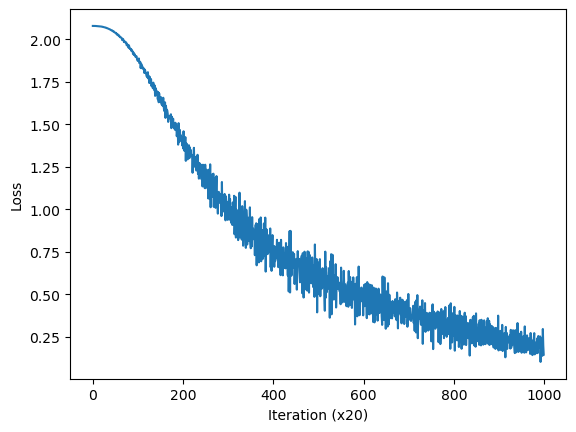

In [21]:
# %load train.py
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.trainer import Trainer
from common.optimizer import Adam
from ch03.simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot


window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = '음악 분야에서 인공지능이 어떻게 활용되고 있는지 궁금해.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [22]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

음악 [-0.893  1.637 -0.925  1.204 -1.186]
분야에서 [-1.385  1.048 -1.275 -0.98   0.997]
인공지능이 [-1.403  0.443 -1.373  1.368 -1.363]
어떻게 [ 0.277  1.467 -1.177 -1.421  1.425]
활용되고 [-0.938 -1.813 -1.106  0.885 -0.922]
있는지 [ 1.536 -1.054  1.192 -1.272  1.254]
궁금해 [ 0.248 -1.682 -0.351  0.407 -0.384]
. [ 0.798 -1.467  1.378 -0.428  0.462]


In [23]:
id_to_word

{0: '음악',
 1: '분야에서',
 2: '인공지능이',
 3: '어떻게',
 4: '활용되고',
 5: '있는지',
 6: '궁금해',
 7: '.'}

In [24]:
from common.util import cos_similarity

c0 = word_vecs[word_to_id['음악']]  # "음악"의 단어 벡터
c1 = word_vecs[word_to_id['인공지능이']]    # "인공지능"의 단어 벡터
print(cos_similarity(c0, c1))

0.8708788


In [25]:
# %load simple_skip_gram.py
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 4.14
| 에폭 26 |

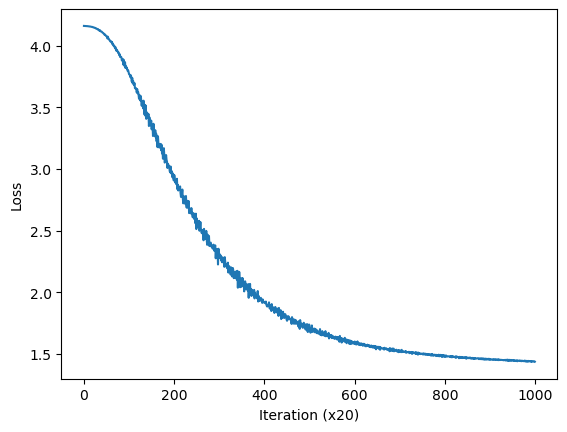

In [26]:
# %load train.py
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.trainer import Trainer
from common.optimizer import Adam
# from simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot


window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = '음악 분야에서 인공지능이 어떻게 활용되고 있는지 궁금해.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleSkipGram(vocab_size, hidden_size)
#model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [27]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id]) 

음악 [ 0.004  0.001 -0.015  0.024  0.004]
분야에서 [ 0.865 -0.268  1.382 -0.878  0.956]
인공지능이 [-0.84   1.323  1.026  0.836 -0.851]
어떻게 [ 1.034 -1.335 -0.829 -1.019  1.054]
활용되고 [-0.911 -1.204  1.241  0.918 -1.018]
있는지 [ 0.737  1.401 -1.254 -0.759  0.704]
궁금해 [-0.858 -1.074 -1.263  0.878 -0.595]
. [ 0.012  0.005 -0.013  0.015 -0.013]


In [28]:
from common.util import cos_similarity

c0 = word_vecs[word_to_id['음악']]  # "you"의 단어 벡터
c1 = word_vecs[word_to_id['인공지능이']]    # "i"의 단어 벡터
print(cos_similarity(c0, c1))

-0.009094432


## 텍스트

In [29]:
#각 문장별 그리고 전체 문장에 대해서 출력
long_text = ''
for conversation in data['dataset']['conversations']:
    for utterance in conversation['utterances']:
        text = utterance['utterance_text']
        corpus, word_to_id, id_to_word = preprocess(text)
        vocab_size = len(word_to_id)
        print(word_to_id)
        print(id_to_word)
        print(corpus)
        C = create_co_matrix(corpus, vocab_size)
        W = ppmi(C)
        np.set_printoptions(precision=3)
        print('동시발생 행렬')
        print(C)
        print('-'*50)
        print('PPMI')
        print(W)
        long_text = long_text + utterance['utterance_text']



#text = utterance['utterance_text']
#print(text)

{'음악': 0, '분야에서': 1, '인공지능이': 2, '어떻게': 3, '활용되고': 4, '있는지': 5, '궁금해': 6, '.': 7}
{0: '음악', 1: '분야에서', 2: '인공지능이', 3: '어떻게', 4: '활용되고', 5: '있는지', 6: '궁금해', 7: '.'}
[0 1 2 3 4 5 6 7]
동시발생 행렬
[[0 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0]
 [0 1 0 1 0 0 0 0]
 [0 0 1 0 1 0 0 0]
 [0 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    2.807 0.    0.    0.    0.    0.    0.   ]
 [2.807 0.    1.807 0.    0.    0.    0.    0.   ]
 [0.    1.807 0.    1.807 0.    0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.    0.    0.    1.807 0.    1.807 0.   ]
 [0.    0.    0.    0.    0.    1.807 0.    2.807]
 [0.    0.    0.    0.    0.    0.    2.807 0.   ]]
{'인공지능은': 0, '음악': 1, '분야에서': 2, '다양하게': 3, '활용되고': 4, '있어요': 5, '.': 6, '예를': 7, '들면': 8, '국내': 9, '최초의': 10, '에이아이': 11, '작곡가': 12, '이봄이': 13, '있죠': 14, '이봄은': 15, '이론을': 16, '학습해': 17, '다양한

In [30]:
print('전체 텍스트')        
corpus, word_to_id, id_to_word = preprocess(long_text)
vocab_size = len(word_to_id)
print(word_to_id)
print(id_to_word)
print(corpus)
LC = create_co_matrix(corpus, vocab_size)
W = ppmi(LC)
np.set_printoptions(precision=3)
print('동시발생 행렬')
print(LC)
print('-'*50)
print('PPMI')
print(W)

전체 텍스트
{'음악': 0, '분야에서': 1, '인공지능이': 2, '어떻게': 3, '활용되고': 4, '있는지': 5, '궁금해': 6, '.인공지능은': 7, '다양하게': 8, '있어요': 9, '.': 10, '예를': 11, '들면': 12, '국내': 13, '최초의': 14, '에이아이': 15, '작곡가': 16, '이봄이': 17, '있죠': 18, '이봄은': 19, '이론을': 20, '학습해': 21, '다양한': 22, '장르의': 23, '선율을': 24, '만들어내는데': 25, '사용되고': 26, '.이봄은': 27, '어떤': 28, '방식으로': 29, '작곡을': 30, '해?이봄은': 31, '화성학,': 32, '대위법': 33, '등': 34, '학습하고': 35, '여러': 36, '만들어냅니다': 37, '실제로': 38, '가수': 39, '홍진영의': 40, "'사랑은": 41, "24시간'과": 42, '삼성전자': 43, '청소기': 44, "'비스포크": 45, '제트': 46, "에이아이'": 47, '광고': 48, '배경음악을': 49, '만들었어요': 50, '.인공지능이': 51, '작곡에': 52, '도움을': 53, '주는': 54, '거야?인공지능을': 55, '기반으로': 56, '한': 57, '작곡': 58, '소프트웨어': 59, "'뮤지아": 60, "원'이": 61, '이': 62, '소프트웨어는': 63, '전문': 64, '지식이': 65, '없는': 66, '일반인도': 67, '쉽게': 68, '음악을': 69, '만들': 70, '수': 71, '있도록': 72, '도와줍니다': 73, '사용자는': 74, '인공지능': 75, '자동': 76, '생성': 77, '기능을': 78, '통해': 79, '멜로디,': 80, '반주,': 81, '베이스,': 82, '비트로': 83, '이뤄진': 84, '4개의': 85, '트랙을': 86, '만든': 87, '뒤,': 

| 에폭 1 |  반복 1 / 97 | 시간 0[s] | 손실 5.40
| 에폭 1 |  반복 21 / 97 | 시간 0[s] | 손실 5.40
| 에폭 1 |  반복 41 / 97 | 시간 0[s] | 손실 5.40
| 에폭 1 |  반복 61 / 97 | 시간 0[s] | 손실 5.40
| 에폭 1 |  반복 81 / 97 | 시간 0[s] | 손실 5.40
| 에폭 2 |  반복 1 / 97 | 시간 0[s] | 손실 5.40
| 에폭 2 |  반복 21 / 97 | 시간 0[s] | 손실 5.40
| 에폭 2 |  반복 41 / 97 | 시간 0[s] | 손실 5.40
| 에폭 2 |  반복 61 / 97 | 시간 0[s] | 손실 5.40
| 에폭 2 |  반복 81 / 97 | 시간 0[s] | 손실 5.40
| 에폭 3 |  반복 1 / 97 | 시간 0[s] | 손실 5.40
| 에폭 3 |  반복 21 / 97 | 시간 0[s] | 손실 5.39
| 에폭 3 |  반복 41 / 97 | 시간 0[s] | 손실 5.39
| 에폭 3 |  반복 61 / 97 | 시간 0[s] | 손실 5.39
| 에폭 3 |  반복 81 / 97 | 시간 0[s] | 손실 5.39
| 에폭 4 |  반복 1 / 97 | 시간 0[s] | 손실 5.39
| 에폭 4 |  반복 21 / 97 | 시간 0[s] | 손실 5.39
| 에폭 4 |  반복 41 / 97 | 시간 0[s] | 손실 5.38
| 에폭 4 |  반복 61 / 97 | 시간 0[s] | 손실 5.38
| 에폭 4 |  반복 81 / 97 | 시간 0[s] | 손실 5.38
| 에폭 5 |  반복 1 / 97 | 시간 0[s] | 손실 5.38
| 에폭 5 |  반복 21 / 97 | 시간 0[s] | 손실 5.37
| 에폭 5 |  반복 41 / 97 | 시간 0[s] | 손실 5.38
| 에폭 5 |  반복 61 / 97 | 시간 0[s] | 손실 5.37
| 에폭 5 |  반복 81 / 97 

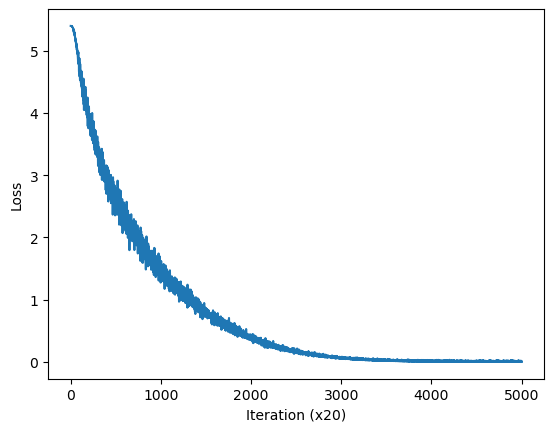

In [31]:
#long_text CBOW
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [32]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

음악 [  7.269   5.134  -4.857 -12.354 -14.055]
분야에서 [ -5.717   6.781 -10.536  11.226  -3.5  ]
인공지능이 [ 5.322 11.7   -3.773  1.596  3.103]
어떻게 [ 11.795  -1.343 -12.221  -8.144   6.231]
활용되고 [10.463 -5.685 -7.192  9.004  2.306]
있는지 [11.185  9.492 -9.339  3.484 -5.135]
궁금해 [ 10.831 -10.652  10.587  -3.37   -5.637]
.인공지능은 [ 7.16   9.561 -5.848  6.204 -5.121]
다양하게 [ 3.565 12.595 -8.212 -2.606  2.608]
있어요 [ 20.681  -3.805  -2.157   1.885 -10.612]
. [-12.319  -9.041 -11.456   3.217 -12.55 ]
예를 [ 9.389 -7.208 -6.792  8.221 10.684]
들면 [-15.343 -11.63   -6.156  10.017  11.407]
국내 [ 2.726  6.357 -7.57   6.036 11.984]
최초의 [-5.717 -7.02   9.663 10.195 -1.828]
에이아이 [-7.762 10.127 -6.747 -7.353 12.605]
작곡가 [ 3.261 -7.623 10.839  8.201 -7.622]
이봄이 [-12.893   7.022   0.427  -6.772   3.131]
있죠 [  7.681 -10.211  -1.09    6.128  -4.754]
이봄은 [ 5.321  0.687 -6.274 11.079  0.825]
이론을 [ -0.332  10.661  -5.439   6.181 -13.971]
학습해 [ 3.003  9.947  8.15  -0.594 -9.39 ]
다양한 [  3.812   3.572 -11.674  -5.385 -11.145]


In [33]:
from common.util import cos_similarity

c0 = word_vecs[word_to_id['음악']]  # "음악"의 단어 벡터
c1 = word_vecs[word_to_id['오디오']]    # "오디오"의 단어 벡터
print(cos_similarity(c0, c1))

0.0648372


In [34]:
most_similar('음악', word_to_id, id_to_word, LC, top=5)


[query] 음악
 인공지능의: 0.6735753113617019
 더욱: 0.5499719383673458
 인공지능이: 0.5499719364229014
 활용될: 0.5499719364229014
 .음악: 0.5499719364229014


| 에폭 1 |  반복 1 / 97 | 시간 0[s] | 손실 5.40
| 에폭 1 |  반복 21 / 97 | 시간 0[s] | 손실 5.40
| 에폭 1 |  반복 41 / 97 | 시간 0[s] | 손실 5.40
| 에폭 1 |  반복 61 / 97 | 시간 0[s] | 손실 5.40
| 에폭 1 |  반복 81 / 97 | 시간 0[s] | 손실 5.40
| 에폭 2 |  반복 1 / 97 | 시간 0[s] | 손실 5.40
| 에폭 2 |  반복 21 / 97 | 시간 0[s] | 손실 5.40
| 에폭 2 |  반복 41 / 97 | 시간 0[s] | 손실 5.40
| 에폭 2 |  반복 61 / 97 | 시간 0[s] | 손실 5.40
| 에폭 2 |  반복 81 / 97 | 시간 0[s] | 손실 5.40
| 에폭 3 |  반복 1 / 97 | 시간 0[s] | 손실 5.40
| 에폭 3 |  반복 21 / 97 | 시간 0[s] | 손실 5.39
| 에폭 3 |  반복 41 / 97 | 시간 0[s] | 손실 5.39
| 에폭 3 |  반복 61 / 97 | 시간 0[s] | 손실 5.39
| 에폭 3 |  반복 81 / 97 | 시간 0[s] | 손실 5.39
| 에폭 4 |  반복 1 / 97 | 시간 0[s] | 손실 5.39
| 에폭 4 |  반복 21 / 97 | 시간 0[s] | 손실 5.38
| 에폭 4 |  반복 41 / 97 | 시간 0[s] | 손실 5.38
| 에폭 4 |  반복 61 / 97 | 시간 0[s] | 손실 5.38
| 에폭 4 |  반복 81 / 97 | 시간 0[s] | 손실 5.39
| 에폭 5 |  반복 1 / 97 | 시간 0[s] | 손실 5.38
| 에폭 5 |  반복 21 / 97 | 시간 0[s] | 손실 5.37
| 에폭 5 |  반복 41 / 97 | 시간 0[s] | 손실 5.37
| 에폭 5 |  반복 61 / 97 | 시간 0[s] | 손실 5.37
| 에폭 5 |  반복 81 / 97 

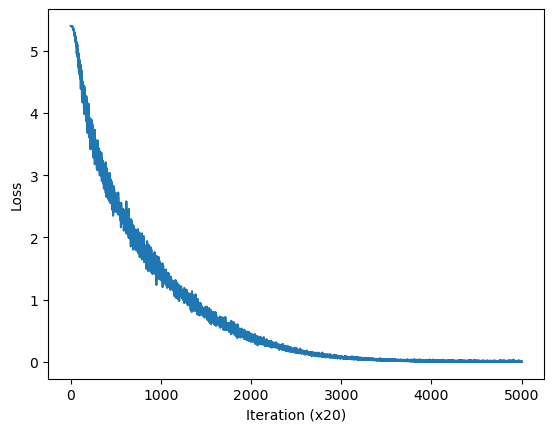

In [35]:
#long_text simple_skip_gram
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [36]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

음악 [  4.942 -13.957   8.181 -10.204  12.056]
분야에서 [-17.279  12.582   3.558  -4.013   9.23 ]
인공지능이 [ 9.264 -2.936  6.562  0.356 -0.965]
어떻게 [13.677  6.475 12.911  2.294 -3.045]
활용되고 [-6.16   7.81   8.529  4.22  12.469]
있는지 [ 9.641  3.401  4.894 -3.044 11.839]
궁금해 [  2.005  -5.982 -10.633   3.013  12.222]
.인공지능은 [ -3.019   7.057   6.857 -10.45    5.826]
다양하게 [ 7.567 -2.423  7.465  1.267 -0.293]
있어요 [15.301 10.131  3.858  0.023  9.741]
. [-11.963 -17.71   -3.132   5.936   6.647]
예를 [ -2.343   7.458   5.873 -10.972  -2.549]
들면 [-12.529   6.975 -10.882  -9.481  15.66 ]
국내 [ 3.778  4.195  1.862 -7.283  2.141]
최초의 [-5.185 10.722  1.237 -7.206 -5.196]
에이아이 [ -4.26    9.944 -13.969   2.147  13.184]
작곡가 [  6.959  11.355   9.906  -8.36  -11.692]
이봄이 [-10.956   3.379 -10.096   6.681  11.17 ]
있죠 [10.995 11.149  1.787 -1.189 -0.737]
이봄은 [-4.57   9.909  6.84  -6.295  2.074]
이론을 [-13.549   3.868   3.815  -5.837   9.733]
학습해 [ -2.098   4.723   4.535 -12.095 -10.308]
다양한 [ 5.903 -3.474  5.664 -5.777  9.

In [37]:
from common.util import cos_similarity

c0 = word_vecs[word_to_id['음악']]  # "음악"의 단어 벡터
c1 = word_vecs[word_to_id['오디오']]    # "오디오"의 단어 벡터
print(cos_similarity(c0, c1))

-0.013516858


In [38]:
most_similar('음악', word_to_id, id_to_word, LC, top=5)


[query] 음악
 인공지능의: 0.6735753113617019
 더욱: 0.5499719383673458
 인공지능이: 0.5499719364229014
 활용될: 0.5499719364229014
 .음악: 0.5499719364229014


## simple RNN

In [39]:
#텍스트 저장
text = ''
long_text = ''
for indx in range(1, 5001): #range(1, 12463)
    filename =f'../project2/데이터 저장용/기술_과학_{indx}.pkl'
    with open(filename, 'rb') as f:
        data = pickle.load(f)
        for conversation in data['dataset']['conversations']:
            for utterance in conversation['utterances']:
                text = utterance['utterance_text']
                long_text = long_text + utterance['utterance_text']

#corpus, word_to_id, id_to_word = preprocess(long_text)
#vocab_size = len(word_to_id)



말뭉치 크기: 1000, 어휘 수: 666
| 에폭 1 | 퍼플렉서티 665.92
| 에폭 2 | 퍼플렉서티 641.37
| 에폭 3 | 퍼플렉서티 615.66
| 에폭 4 | 퍼플렉서티 580.32
| 에폭 5 | 퍼플렉서티 566.17
| 에폭 6 | 퍼플렉서티 538.79
| 에폭 7 | 퍼플렉서티 530.55
| 에폭 8 | 퍼플렉서티 526.64
| 에폭 9 | 퍼플렉서티 508.85
| 에폭 10 | 퍼플렉서티 506.16
| 에폭 11 | 퍼플렉서티 495.92
| 에폭 12 | 퍼플렉서티 495.49
| 에폭 13 | 퍼플렉서티 489.21
| 에폭 14 | 퍼플렉서티 480.08
| 에폭 15 | 퍼플렉서티 473.33
| 에폭 16 | 퍼플렉서티 480.51
| 에폭 17 | 퍼플렉서티 464.57
| 에폭 18 | 퍼플렉서티 468.29
| 에폭 19 | 퍼플렉서티 461.07
| 에폭 20 | 퍼플렉서티 449.26
| 에폭 21 | 퍼플렉서티 447.98
| 에폭 22 | 퍼플렉서티 441.54
| 에폭 23 | 퍼플렉서티 443.21
| 에폭 24 | 퍼플렉서티 441.89
| 에폭 25 | 퍼플렉서티 431.11
| 에폭 26 | 퍼플렉서티 422.41
| 에폭 27 | 퍼플렉서티 413.92
| 에폭 28 | 퍼플렉서티 406.42
| 에폭 29 | 퍼플렉서티 407.35
| 에폭 30 | 퍼플렉서티 394.86
| 에폭 31 | 퍼플렉서티 403.56
| 에폭 32 | 퍼플렉서티 373.95
| 에폭 33 | 퍼플렉서티 373.63
| 에폭 34 | 퍼플렉서티 354.88
| 에폭 35 | 퍼플렉서티 351.51
| 에폭 36 | 퍼플렉서티 343.70
| 에폭 37 | 퍼플렉서티 331.71
| 에폭 38 | 퍼플렉서티 308.20
| 에폭 39 | 퍼플렉서티 308.81
| 에폭 40 | 퍼플렉서티 293.73
| 에폭 41 | 퍼플렉서티 280.71
| 에폭 42 | 퍼플렉서티 272.71
| 에폭 43 | 퍼플렉서티 254

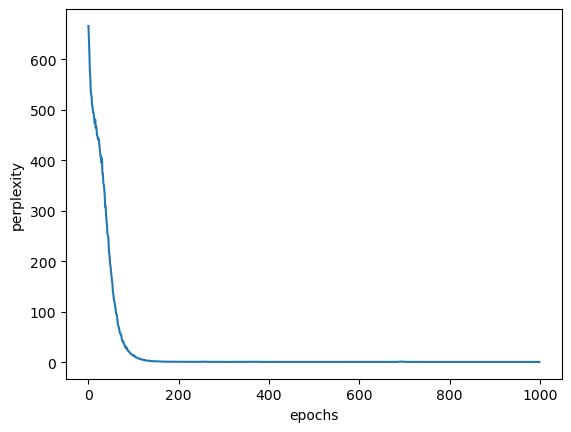

In [40]:
#simple RNN에 적용
# %load train_custom_loop.py
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD    #확률적 경사 하강법
#from dataset import ptb #PTB(Penn Treebank)데이터셋 사용
from ch05.simple_rnnlm import SimpleRnnlm    #간단한 RNN 기반 언어 모델 클래스.



# 하이퍼파라미터 설정
batch_size = 10 # 한 번의 학습에서 처리하는 데이터 샘플의 수.
wordvec_size = 100  # 단어 벡터(word embedding)의 차원.
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수
time_size = 5     # Truncated BPTT가 한 번에 펼치는 시간 크기
lr = 0.1          # 학습률(learning rate).   
max_epoch = 1000   # 학습 반복 횟수.

# 학습 데이터 읽기(전체 중 1000개만)
corpus, word_to_id, id_to_word = preprocess(long_text)    # long_text를 불러옵니다.
# word_to_id: 단어를 고유 ID로 변환하는 사전.
# id_to_word: 고유 ID를 단어로 변환하는 사전.
corpus_size = 1000
corpus = corpus[:corpus_size]   # 텍스트 데이터의 단어 ID 시퀀스입니다. 예를 들어, corpus = [5, 8, 2, 1, ...].
vocab_size = int(max(corpus) + 1) # vocab_size : 어휘 수. 최대 단어 ID + 1.

xs = corpus[:-1]  # 입력
ts = corpus[1:]   # 출력(정답 레이블)
data_size = len(xs) # 입력 데이터 시퀀스.
print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))

# 학습 시 사용하는 변수
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)  #입력 시퀀스를 처리하고 다음 단어를 예측.
optimizer = SGD(lr) #확률적 경사 하강법으로 모델의 매개변수 업데이트.

# 미니배치의 각 샘플의 읽기 시작 위치를 계산
jump = (corpus_size - 1) // batch_size # 미니배치를 만들기 위해 데이터 시퀀스를 나누는 간격.
offsets = [i * jump for i in range(batch_size)] # 각 배치 샘플이 시작하는 데이터의 인덱스. 

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # 미니배치 취득
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1
        """
        각 배치에서 batch_x는 입력, batch_t는 출력(정답)입니다.
        time_size만큼 시퀀스를 생성.
        순환적 인덱스 계산:
        (offset + time_idx) % data_size로 데이터가 순환하도록 설정.
        """

        # 기울기를 구하여 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count += 1
        """
        순전파(forward):
            입력(batch_x)과 출력(batch_t)을 모델에 전달해 손실(loss) 계산.
        역전파(backward):
            손실에 따른 모델의 기울기(gradient) 계산.
        매개변수 업데이트:
            optimizer.update로 기울기를 사용해 매개변수 갱신.
        """
        

    # 에폭마다 퍼플렉서티 평가
    ppl = np.exp(total_loss / loss_count)
    print('| 에폭 %d | 퍼플렉서티 %.2f'
          % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0
    """
    퍼플렉서티(Perplexity):
        언어 모델의 성능을 평가하는 지표.
        낮을수록 좋으며, 모델이 텍스트를 더 잘 예측한다는 뜻.
    """

# 그래프 그리기
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list, label='train')
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()

| 에폭 1 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 664.13
| 에폭 2 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 664.66
| 에폭 3 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 645.97
| 에폭 4 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 613.99
| 에폭 5 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 577.30
| 에폭 6 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 553.77
| 에폭 7 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 537.42
| 에폭 8 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 516.90
| 에폭 9 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 516.03
| 에폭 10 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 503.67
| 에폭 11 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 493.10
| 에폭 12 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 490.42
| 에폭 13 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 493.93
| 에폭 14 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 482.58
| 에폭 15 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 481.38
| 에폭 16 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 472.51
| 에폭 17 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 470.58
| 에폭 18 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 469.70
| 에폭 19 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 453.46
| 에폭 20 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 452.85
| 에폭 21 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 449.62
| 에폭 22 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 441.

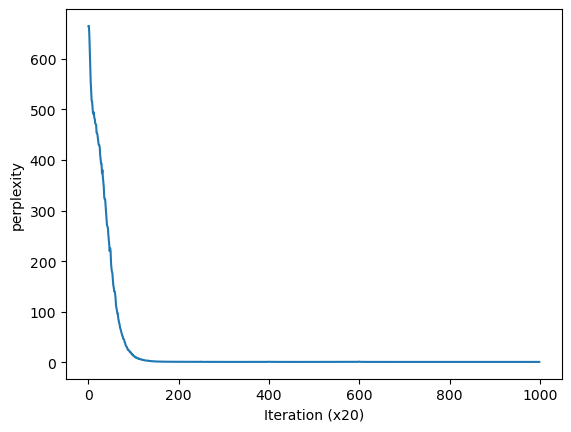

In [41]:
# %load train.py
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import RnnlmTrainer #trainer 클래스 사용
#from dataset import ptb
from ch05.simple_rnnlm import SimpleRnnlm


# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 5  # RNN을 펼치는 크기
lr = 0.1
max_epoch = 1000

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = preprocess(long_text)    # long_text를 불러옵니다.
corpus_size = 1000  # 테스트 데이터셋을 작게 설정
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)
xs = corpus[:-1]  # 입력
ts = corpus[1:]  # 출력（정답 레이블）

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

trainer.fit(xs, ts, max_epoch, batch_size, time_size)
trainer.plot()

## 각 항목 평가

In [64]:
key_yes_count = {}  # 각 key에 대해 'yes'의 개수
key_total_count = {}  # 각 key의 총 개수


for indx in range(1, 5001): #range(1, 12463)
    filename =f'../project2/데이터 저장용/기술_과학_{indx}.pkl'
    with open(filename, 'rb') as f:
        data = pickle.load(f)
        for conversation in data['dataset']['conversations']:
            for utterance in conversation['utterances']:
                text = utterance['utterance_text']
                long_text = long_text + utterance['utterance_text']


        
            #print(f"Exchange ID: {utterance['exchange_id']}")
            #print(f"Utterance ID: {utterance['utterance_id']}")
            #print(f"Speaker ID: {utterance['speaker_id']}")
            #print(f"Utterance Text: {utterance['utterance_text']}")
            #print("Evaluations:")
                evaluations = utterance.get('utterance_evaluation', [])
                for eval in evaluations:
                    #print("Evaluations:")
                    for key, value in eval.items():
                        #print(f"{key}: {value}")
                        if key not in key_yes_count:
                            key_yes_count[key] = 0
                            key_total_count[key] = 0
                
                        key_total_count[key] += 1  # 해당 key의 항목 개수 증가
            
                        if value == "yes":
                            key_yes_count[key] += 1  # 'yes'가 있을 경우 카운트 증가


for key in key_total_count:
    if key_total_count[key] > 0:
        #print(key_total_count[key])
        #print(key_yes_count[key])
        yes_ratio = key_yes_count[key] / key_total_count[key] 
        print(f"Key: {key} - Yes 비율: {yes_ratio * 100:.2f}%")
    else:
        print(f"Key: {key} - 평가 항목이 없습니다.")


Key: linguistic_acceptability - Yes 비율: 86.32%
Key: consistency - Yes 비율: 99.53%
Key: interestingness - Yes 비율: 92.97%
Key: unbias - Yes 비율: 87.00%
Key: harmlessness - Yes 비율: 84.98%
Key: no_hallucination - Yes 비율: 92.95%
Key: understandability - Yes 비율: 71.45%
Key: sensibleness - Yes 비율: 96.65%
Key: specificity - Yes 비율: 93.28%


In [58]:
#reserved
"""
import numpy as np
from collections import Counter
import re

# 1. 텍스트 데이터 로드
text_data = [
    "음악 분야에서 인공지능이 어떻게 활용되고 있는지 궁금해.",
    "인공지능은 음악 분야에서 다양하게 활용되고 있어요. 예를 들면 국내 최초의 에이아이 작곡가 이봄이 있죠."
]

# 2. 텍스트 전처리 (단어 단위로 분할)
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # 특수문자 제거
    text = text.lower()  # 소문자로 변환
    words = text.split()  # 공백 기준으로 단어 분할
    return words

# 전처리된 단어들로 리스트 생성
corpus = []
for sentence in text_data:
    corpus.extend(preprocess_text(sentence))

# 3. 단어 ID 매핑 만들기
word_count = Counter(corpus)
vocab = sorted(word_count, key=word_count.get, reverse=True)

word2id = {word: idx for idx, word in enumerate(vocab)}
id2word = {idx: word for word, idx in word2id.items()}

# 4. 데이터를 입력과 출력 쌍으로 나누기 (간단한 예로, n-gram 형태로)
def prepare_data(corpus, window_size=1):
    inputs = []
    targets = []
    for i in range(len(corpus) - window_size):
        inputs.append([word2id[corpus[i]]])
        targets.append(word2id[corpus[i + window_size]])
    return np.array(inputs), np.array(targets)

inputs, targets = prepare_data(corpus)
"""